In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
batch_size = 120
num_classes = 10
epochs = 50

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

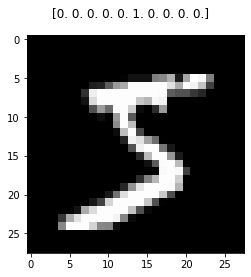

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [4]:
def plot_digit(i: int, title = "") -> int:
    """Plot the i-th digit in the training set, returns the plotted digit"""
    image = x_train[i]# plot the sample
    fig = plt.figure
    plt.suptitle(str(y_train[i]) + title)
    plt.imshow(image, cmap='gray')
    plt.show()
    return y_train[i]
plot_digit(0)

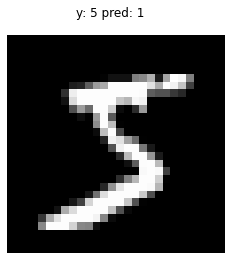

In [6]:
def plot(x, y, y_pred):
    fig = plt.figure
    plt.suptitle("y: " + str(y) + " pred: " + str(y_pred))
    plt.axis("off")
    plt.imshow(x, cmap='gray')
    plt.show()
    
plot(x_train[0], y_train[0].argmax(), 1)

In [7]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        
        layers.Conv2D(32, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(48, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(80, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(96, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(112, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(144, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(160, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(176, (3,3)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        
    ],
    name="m3"
)

model5 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        
        layers.Conv2D(32, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(96, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(160, (5,5)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        
    ],
    name="m5"
)

model7 = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        
        layers.Conv2D(48, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(96, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(144, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(192, (7,7)),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        
    ],    
    name="m7"
)

In [8]:
decay_steps = x_train.shape[0] / batch_size

lr3 = keras.optimizers.schedules.ExponentialDecay(
    0.001, decay_steps, 0.98, staircase=True
)
lr5 = keras.optimizers.schedules.ExponentialDecay(
    0.001, decay_steps, 0.98, staircase=True
)
lr7 = keras.optimizers.schedules.ExponentialDecay(
    0.001, decay_steps, 0.98, staircase=True
)

model3.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr3),
              metrics=["accuracy"])
model5.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr5),
              metrics=["accuracy"])
model7.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr7),
              metrics=["accuracy"])

In [ ]:
model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
model7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [9]:
model3 = keras.models.load_model("model3")
model5 = keras.models.load_model("model5")
model7 = keras.models.load_model("model7")

In [10]:
model3.evaluate(x_test, y_test)
model5.evaluate(x_test, y_test)
model7.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.1613 - accuracy: 0.9909


[0.16126108169555664, 0.9908999800682068]

In [11]:
def evaluate(predictfun):
    total = 0
    correct = 0

    preds = predictfun(x_test).round()

    for (x,y) in zip(preds, y_test):
        total += 1
        if((x == y).all()):
            correct += 1

    print(f"{correct} / {total}")

def ensemblepredict(xset):
    preds3 = model3.predict(xset)
    preds5 = model5.predict(xset)
    preds7 = model7.predict(xset)
    
    r = []
    for (x,y,z) in zip(preds3, preds5, preds7):
        if (x.round() == y.round()).all() or (x.round() == z.round()).all():
            r.append(x.round())
            
        elif (y.round() == z.round()).all():
            r.append(y.round())
            
        else:
            val = (x + y + z)
            val = (val == val.max()).astype(int)
            r.append(val)
            #print("---")
            #print(x)
            #print(y)
            #print(z)
            #print(val)
            
    return np.asarray(r)


In [12]:
evaluate(model3.predict)
evaluate(model5.predict)
evaluate(model7.predict)
evaluate(ensemblepredict)


9907 / 10000
9911 / 10000
9909 / 10000
9935 / 10000


In [13]:
preds = ensemblepredict(x_test).round()

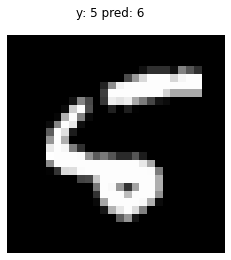

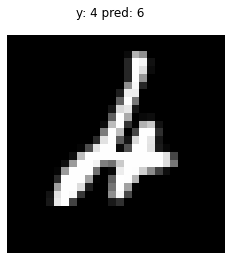

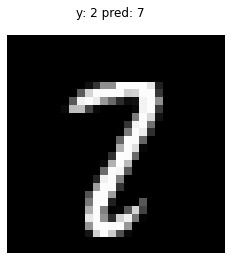

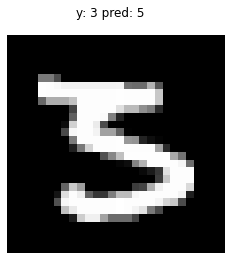

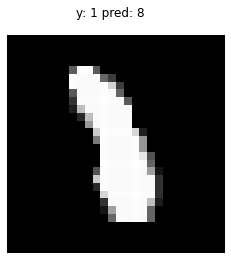

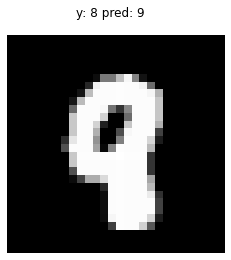

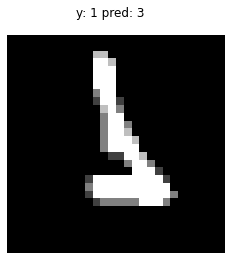

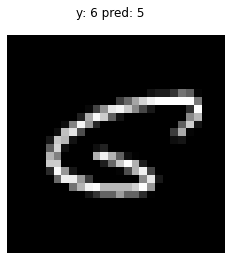

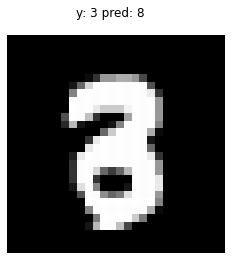

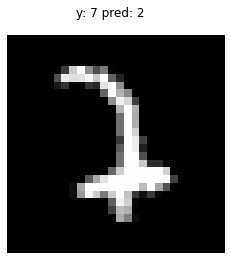

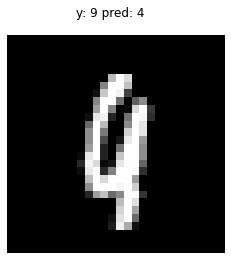

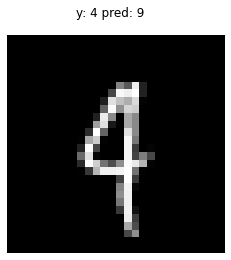

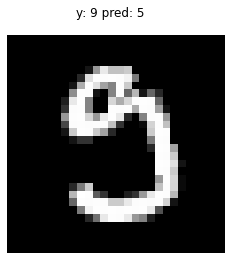

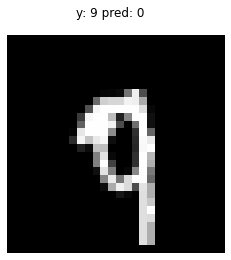

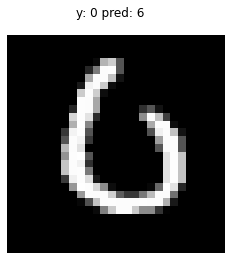

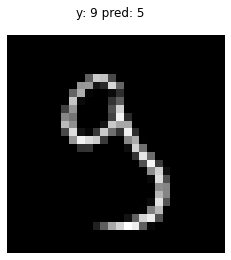

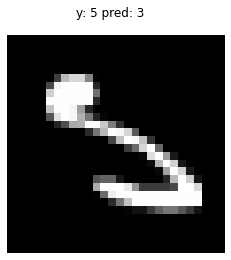

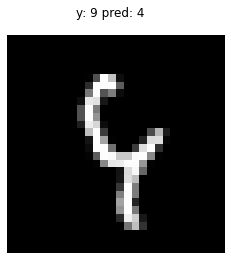

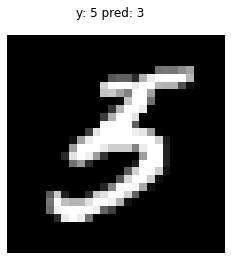

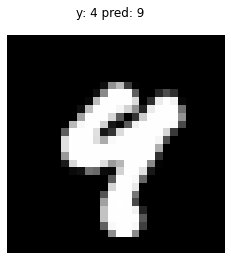

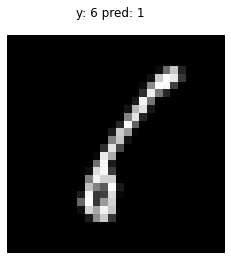

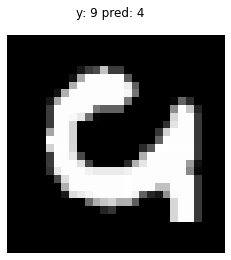

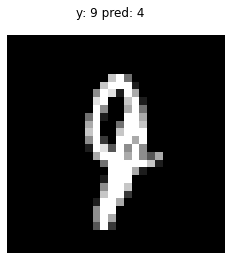

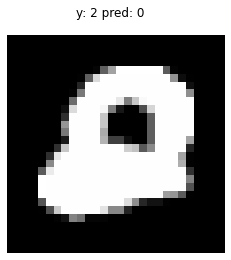

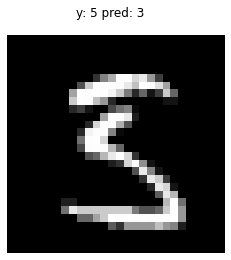

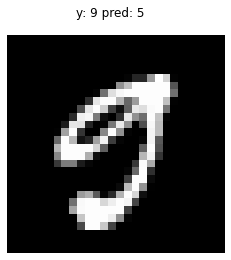

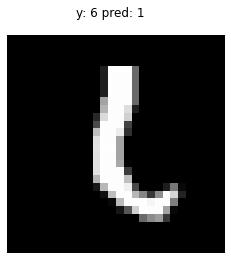

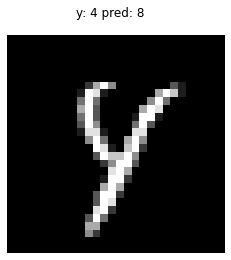

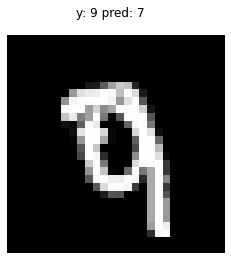

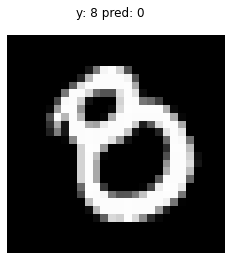

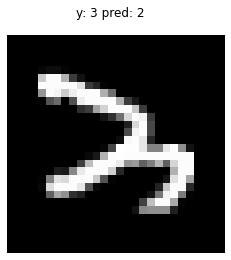

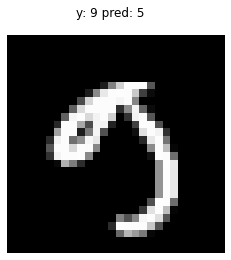

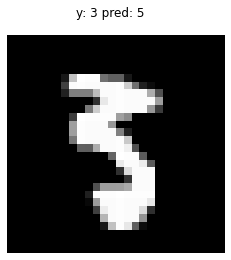

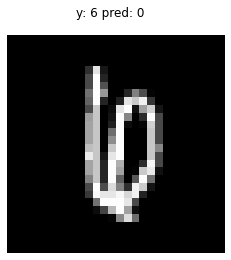

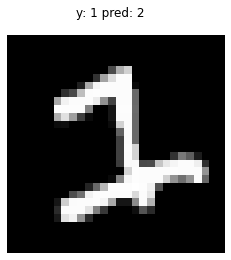

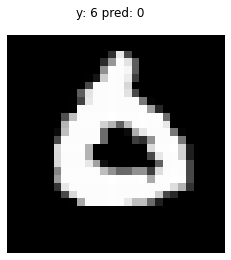

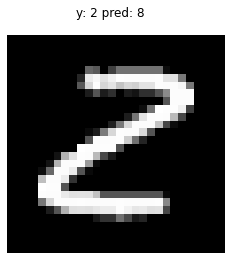

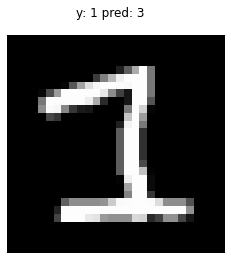

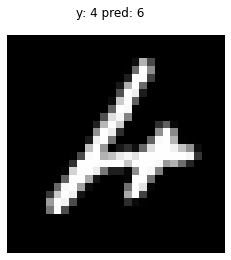

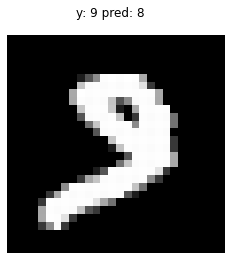

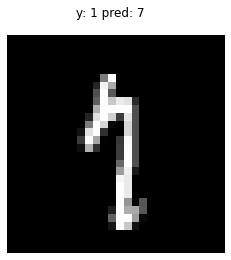

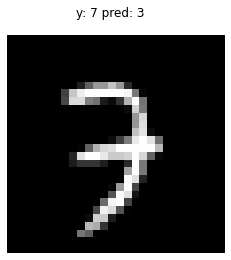

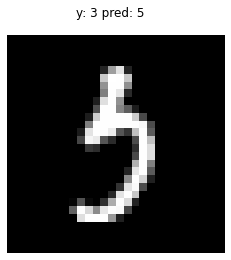

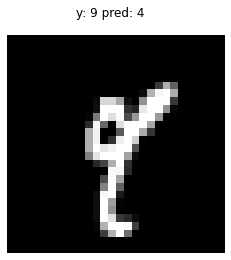

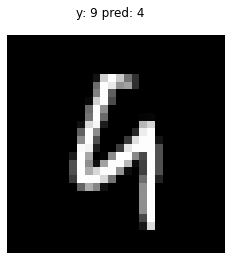

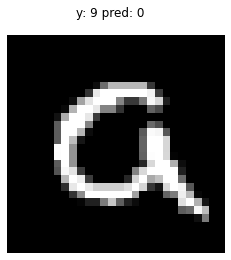

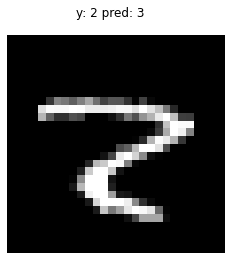

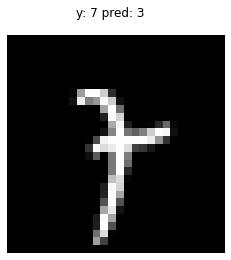

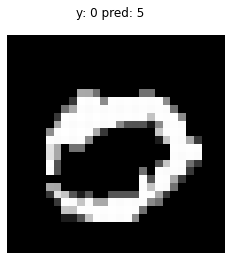

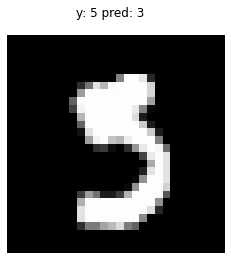

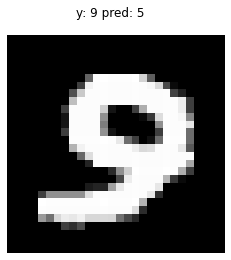

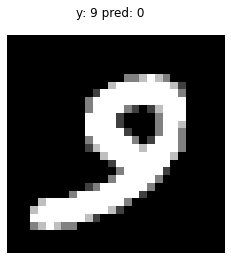

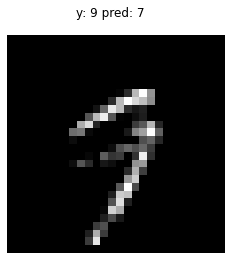

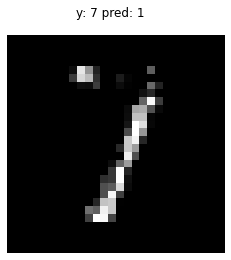

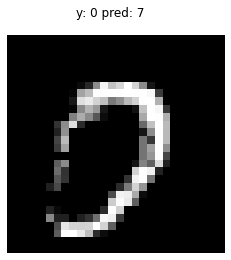

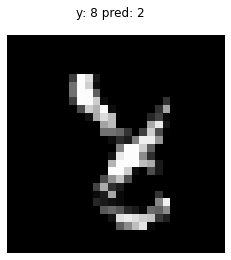

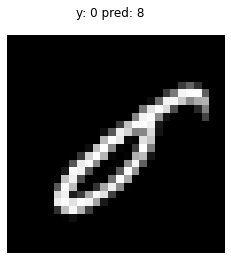

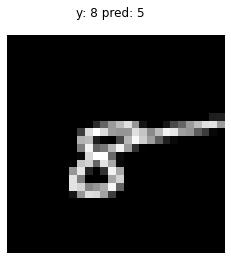

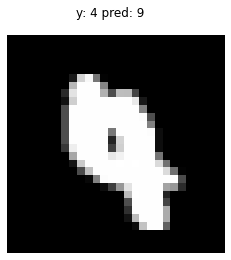

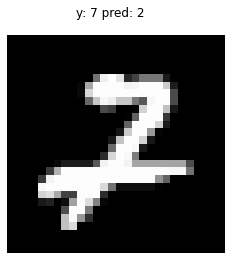

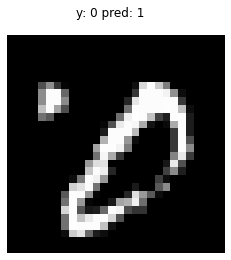

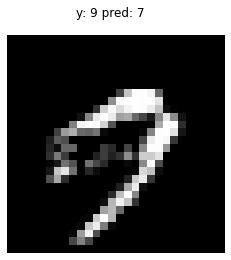

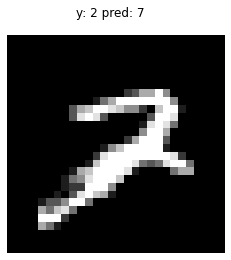

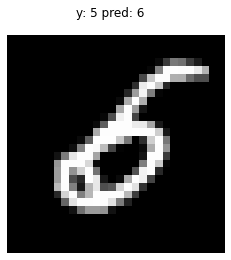

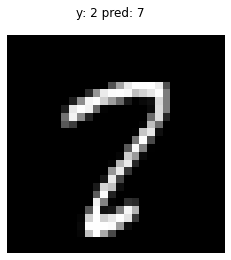

In [14]:
i = 0
for (im, y_pred, y) in zip(x_test, preds, y_test):
    if ((y_pred != y).any()):
        #print(y)
        #print(y_test)
        plot(im, y.argmax(), y_pred.argmax())
    i += 1

In [ ]:
model3.save("model3")
model5.save("model5")
model7.save("model7")